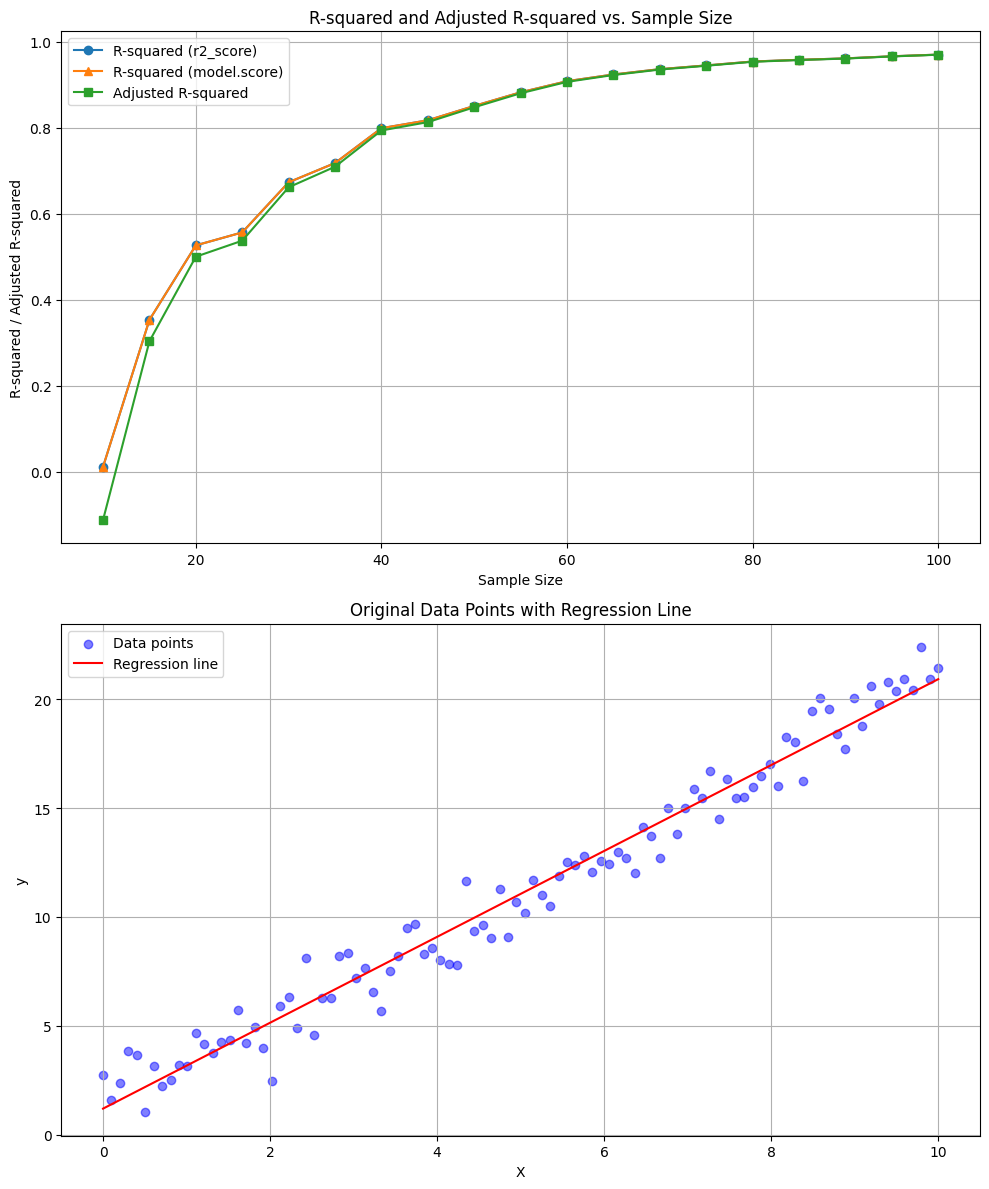

Final R-squared (r2_score, from sklearn.metrics import r2_score): 0.9704
Final R-squared (model.score): 0.9704
Final Adjusted R-squared: 0.9701


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, (100, 1))

# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Lists to store R-squared and adjusted R-squared values
r2_values = []
adj_r2_values = []
score_values = []

# Calculate R-squared and adjusted R-squared for different sample sizes
sample_sizes = range(10, len(X) + 1, 5)
for n in sample_sizes:
    X_sample = X[:n]
    y_sample = y[:n]
    
    model = LinearRegression()
    model.fit(X_sample, y_sample)
    
    y_pred = model.predict(X_sample)
    r2 = r2_score(y_sample, y_pred)
    score = model.score(X_sample, y_sample)  # Using sklearn's built-in R-squared calculation
    adj_r2 = adjusted_r2(r2, n, 1)  # 1 predictor variable (X) is used to predict y in the linear regression
    
    r2_values.append(r2)
    adj_r2_values.append(adj_r2)
    score_values.append(score)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot R-squared and Adjusted R-squared
ax1.plot(sample_sizes, r2_values, label='R-squared (r2_score)', marker='o')
ax1.plot(sample_sizes, score_values, label='R-squared (model.score)', marker='^')
ax1.plot(sample_sizes, adj_r2_values, label='Adjusted R-squared', marker='s')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('R-squared / Adjusted R-squared')
ax1.set_title('R-squared and Adjusted R-squared vs. Sample Size')
ax1.legend()
ax1.grid(True)

# Plot original data points and regression line
ax2.scatter(X, y, color='blue', alpha=0.5, label='Data points')
ax2.plot(X, model.predict(X), color='red', label='Regression line')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.set_title('Original Data Points with Regression Line')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print final values
print(f"Final R-squared (r2_score, from sklearn.metrics import r2_score): {r2_values[-1]:.4f}")
print(f"Final R-squared (model.score): {score_values[-1]:.4f}")
print(f"Final Adjusted R-squared: {adj_r2_values[-1]:.4f}")
